# Import CSV

In [1]:
import pandas as pd
df = pd.read_csv('DSC 288 Processed Reddit Dataset.csv')
print(df)

                                                  Title  \
0     Your anger may be caused by a magnesium defici...   
1     Do you ever get so angry that you wish to kill...   
2     Does anyone else just avoid people because you...   
3     Was anyone else “not allowed” to get upset gro...   
4     I wish people understood that outbursts don't ...   
...                                                 ...   
9073  Fastest way I’ve found to get a panic attack u...   
9074                                 Looking for advice   
9075                        New panic attack experience   
9076  I’m having pretty bad suicidal thoughts, think...   
9077      Anxiety symptoms replicating low blood sugar?   

                                                   Text  Score  Topic  \
0     I tried absolutely everything to fix my chroni...    743  anger   
1     I don't know if it's my anger issues talking o...    692  anger   
2     Lately I’ve been noticing that I take the extr...    489  anger   

In [2]:
#Retokenize
import nltk
nltk.download('punkt_tab')

lda1_df = df.copy()

lda1_df['Title_pro'] = lda1_df.apply(lambda row: nltk.word_tokenize(row['Title_pro']), axis=1)
lda1_df['Text_pro'] = lda1_df.apply(lambda row: nltk.word_tokenize(row['Text_pro']), axis=1)
lda1_df['T_T_pro'] = lda1_df.apply(lambda row: nltk.word_tokenize(row['T_T_pro']), axis=1)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
print(lda1_df['T_T_pro'])

0       [anger, may, caused, magnesium, deficiency, ne...
1       [ever, get, angry, wish, kill, moment, dont, k...
2       [anyone, else, avoid, people, know, theyll, ma...
3       [anyone, else, allowed, get, upset, growing, a...
4       [wish, people, understood, outburst, dont, hap...
                              ...                        
9073    [fastest, way, ive, found, get, panic, attack,...
9074    [looking, advice, hi, im, f, ive, professional...
9075    [new, panic, attack, experience, hi, guy, want...
9076    [im, pretty, bad, suicidal, thought, thinking,...
9077    [anxiety, symptom, replicating, low, blood, su...
Name: T_T_pro, Length: 9078, dtype: object


# LDA: Title vs Text vs Both vs Both-Common

In [4]:
!pip install pandas gensim spacy nltk matplotlib

In [5]:
#Create Dictionary and Corpus from T_T
import gensim
import gensim.corpora as corpora

In [6]:
id2word = corpora.Dictionary(lda1_df['T_T_pro'])
texts = lda1_df['T_T_pro']
corpus = [id2word.doc2bow(text) for text in texts]

In [7]:
#Build LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=3,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [8]:
#Print Topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.029*"im" + 0.024*"like" + 0.023*"feel" + 0.013*"dont" + 0.011*"get" + 0.011*"know" + 0.009*"anyone" + 0.009*"ive" + 0.009*"disorder" + 0.008*"feeling"')
(1, '0.056*"panic" + 0.045*"attack" + 0.012*"year" + 0.012*"heart" + 0.011*"anxiety" + 0.010*"day" + 0.009*"time" + 0.009*"ive" + 0.008*"felt" + 0.008*"month"')
(2, '0.058*"eating" + 0.043*"eat" + 0.042*"food" + 0.040*"weight" + 0.015*"ed" + 0.013*"body" + 0.013*"calorie" + 0.011*"meal" + 0.009*"request" + 0.008*"diet"')


In [9]:
#Compute Coherence Score
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4975214707416586


What just happened?

LDA has found 3 topics with those 10 words being the most associated with them.

Coherence score >0.5 means it is coherent and interpretable BUT room for improvement since range is 0 to 1. For reference, 0.55 is okay, 0.65 is a good spot to aim for, 0.7 is ideal, and anything above 0.8 probably means something is wrong.


In [10]:
#Title Only
id2word = corpora.Dictionary(lda1_df['Title_pro'])
texts = lda1_df['Title_pro']
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=3,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['Title_pro'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.050*"disorder" + 0.043*"anxiety" + 0.023*"help" + 0.019*"eating" + 0.015*"year" + 0.015*"need" + 0.015*"symptom" + 0.011*"someone" + 0.011*"please" + 0.009*"think"')
(1, '0.026*"feeling" + 0.023*"day" + 0.021*"cant" + 0.018*"going" + 0.018*"life" + 0.016*"fear" + 0.015*"today" + 0.014*"stop" + 0.013*"youre" + 0.012*"advice"')
(2, '0.125*"panic" + 0.095*"attack" + 0.036*"anyone" + 0.029*"im" + 0.022*"get" + 0.022*"feel" + 0.021*"else" + 0.020*"request" + 0.019*"like" + 0.008*"heart"')

Coherence Score:  0.310953304647795


In [11]:
#Text Only
id2word = corpora.Dictionary(lda1_df['Text_pro'])
texts = lda1_df['Text_pro']
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=3,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['Text_pro'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.032*"im" + 0.024*"like" + 0.022*"feel" + 0.012*"get" + 0.012*"dont" + 0.011*"know" + 0.010*"ive" + 0.009*"feeling" + 0.008*"really" + 0.008*"even"')
(1, '0.024*"eat" + 0.024*"food" + 0.016*"na" + 0.013*"eating" + 0.012*"fucking" + 0.011*"gon" + 0.009*"calorie" + 0.009*"shes" + 0.008*"meal" + 0.008*"mom"')
(2, '0.056*"panic" + 0.044*"attack" + 0.017*"anxiety" + 0.013*"heart" + 0.012*"year" + 0.010*"day" + 0.009*"time" + 0.009*"started" + 0.008*"month" + 0.008*"felt"')

Coherence Score:  0.404436882844603


Individually, the coherence scores of Title and Text are <0.5 meaning they are pretty bad.

In [12]:
#Remove most common words
lda2_df = df.copy()
print(lda2_df['T_T_pro'])

0       anger may caused magnesium deficiency neuron l...
1       ever get angry wish kill moment dont know ange...
2       anyone else avoid people know theyll make angr...
3       anyone else allowed get upset growing always s...
4       wish people understood outburst dont happen sm...
                              ...                        
9073    fastest way ive found get panic attack control...
9074    looking advice hi im f ive professionally diag...
9075    new panic attack experience hi guy wanted see ...
9076    im pretty bad suicidal thought thinking cant h...
9077    anxiety symptom replicating low blood sugar sc...
Name: T_T_pro, Length: 9078, dtype: object


In [13]:
#common words found with EDA
common = ['im', 'like', 'feel', 'dont', 'get' 'time', 'know', 'ive', 'people',
          'day', 'want', 'thing', 'even', 'one', 'life', 'year', 'really', 'make']
for word in common:
  lda2_df['T_T_pro'] = lda2_df['T_T_pro'].str.replace(word, '', regex=False)

print(lda2_df['T_T_pro'])

0       anger may caused magnesium deficiency neuron l...
1       ever get angry wish kill moment   anger issue ...
2       any else avoid   theyll  angry lately  noticin...
3       any else allowed get upset growing always scol...
4       wish  understood outburst  happen small issue ...
                              ...                        
9073    fastest way  found get panic attack control us...
9074    looking advice hi  f  professionally diagnosed...
9075    new panic attack experience hi guy ed see any ...
9076     pretty bad suicidal thought thinking cant han...
9077    anxiety symptom replicating low blood sugar sc...
Name: T_T_pro, Length: 9078, dtype: object


In [14]:
#Tokenize
lda2_df['T_T_pro'] = lda2_df.apply(lambda row: nltk.word_tokenize(row['T_T_pro']), axis=1)

#LDA
id2word = corpora.Dictionary(lda2_df['T_T_pro'])
texts = lda2_df['T_T_pro']
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=3,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
coherence_model_lda = CoherenceModel(model=lda_model, texts=lda2_df['T_T_pro'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.013*"anxiety" + 0.012*"disorder" + 0.010*"help" + 0.009*"every" + 0.009*"some" + 0.009*"symptom" + 0.008*"any" + 0.008*"body" + 0.008*"get" + 0.007*"ing"')
(1, '0.047*"panic" + 0.039*"attack" + 0.012*"get" + 0.011*"heart" + 0.010*"te" + 0.008*"go" + 0.008*"going" + 0.008*"any" + 0.007*"anxiety" + 0.007*"every"')
(2, '0.028*"doctor" + 0.016*"medication" + 0.015*"blood" + 0.012*"mg" + 0.011*"disorder" + 0.011*"xanax" + 0.011*"test" + 0.007*"symptom" + 0.007*"lexapro" + 0.007*"psychiatrist"')

Coherence Score:  0.4221011881021473


Removing what we thought were common words made it harder to distinguish topics from one another.

# LDA: Number of Topics

Before, all our models were set to 3 topics. Our data actually contains 6 based on the subreddits scraped. Will more topics set in the model make a difference?

In [15]:
#Number of Topics
k = [2,3,4,5,6,7,8]
c_v = []
#u_mass is similar to c_v and will be useful to look at later
u_m = []

#lda1 Title+Text did the best so we will stick with this
for top in k:
  id2word = corpora.Dictionary(lda1_df['T_T_pro'])
  texts = lda1_df['T_T_pro']
  corpus = [id2word.doc2bow(text) for text in texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=top,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
  c_v.append(coherence_model_lda.get_coherence())
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda2_df['T_T_pro'], dictionary=id2word, coherence='u_mass')
  u_m.append(coherence_model_lda.get_coherence())

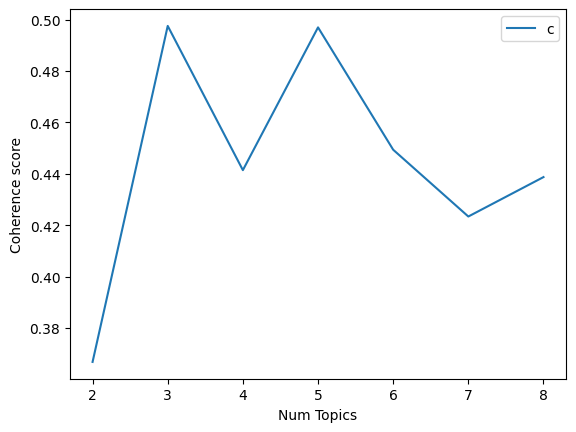

In [16]:
#Graph
import matplotlib.pyplot as plt
plt.plot(k, c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

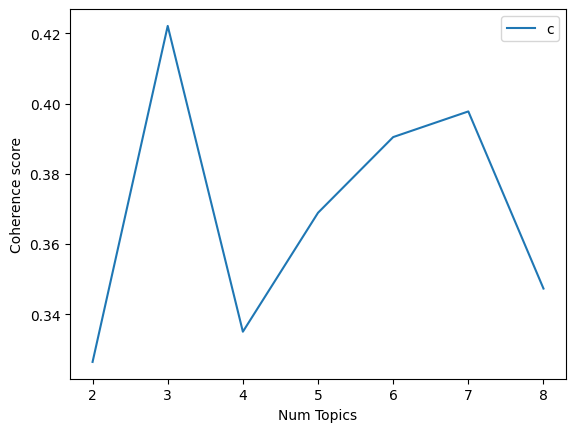

In [17]:
k = [2,3,4,5,6,7,8]
c_v = []

for top in k:
  id2word = corpora.Dictionary(lda2_df['T_T_pro'])
  texts = lda2_df['T_T_pro']
  corpus = [id2word.doc2bow(text) for text in texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=top,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda2_df['T_T_pro'], dictionary=id2word, coherence='c_v')
  c_v.append(coherence_model_lda.get_coherence())

plt.plot(k, c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Try looking at U_mass to triple check. U_mass wants to be close to 0.

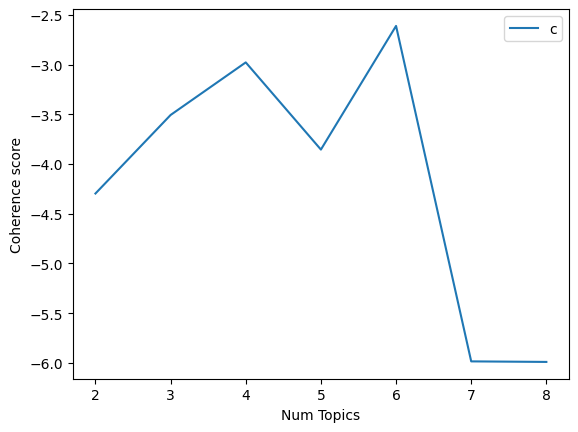

In [18]:
plt.plot(k, u_m)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

It appears 3 topics seem to work best for the LDA.

# LDA: Parameter Optimization

By tuning the passes (Number of passes through the corpus during training), iterations (Maximum number of iterations through the corpus when inferring the topic distribution of a corpus), and chunk size (Number of documents to be used in each training chunk), we can try to optimize LDA.

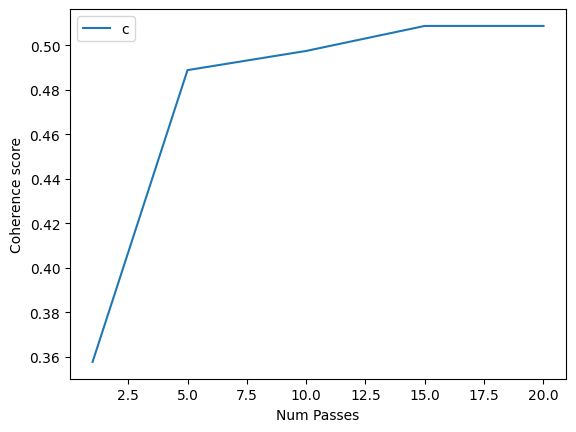

In [19]:
k = [1, 5, 10, 15, 20]
c_v = []

for p in k:
  id2word = corpora.Dictionary(lda1_df['T_T_pro'])
  texts = lda1_df['T_T_pro']
  corpus = [id2word.doc2bow(text) for text in texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=3,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=p,
                                              alpha='auto',
                                              per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
  c_v.append(coherence_model_lda.get_coherence())

plt.plot(k, c_v)
plt.xlabel("Num Passes")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

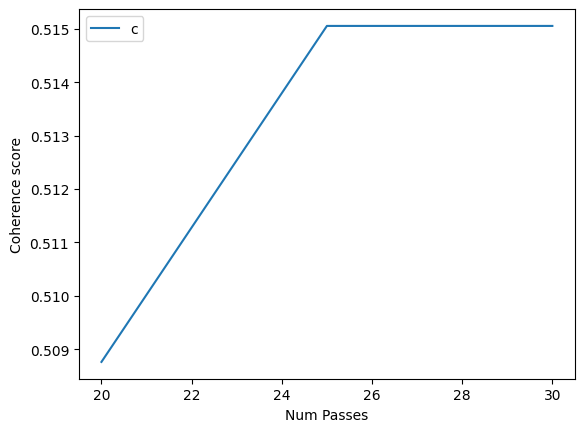

In [20]:
k = [20, 25, 30]
c_v = []

for p in k:
  id2word = corpora.Dictionary(lda1_df['T_T_pro'])
  texts = lda1_df['T_T_pro']
  corpus = [id2word.doc2bow(text) for text in texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=3,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=p,
                                              alpha='auto',
                                              per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
  c_v.append(coherence_model_lda.get_coherence())

plt.plot(k, c_v)
plt.xlabel("Num Passes")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

It plateaus at 25 passes.

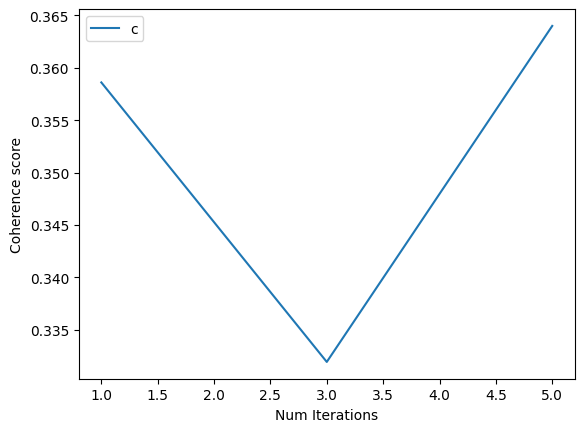

In [21]:
k = [1, 3, 5]
c_v = []

for i in k:
  id2word = corpora.Dictionary(lda1_df['T_T_pro'])
  texts = lda1_df['T_T_pro']
  corpus = [id2word.doc2bow(text) for text in texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=3,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=25,
                                              alpha='auto',
                                              iterations=i,
                                              per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
  c_v.append(coherence_model_lda.get_coherence())

plt.plot(k, c_v)
plt.xlabel("Num Iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Increasing iterations just decreases c_v.

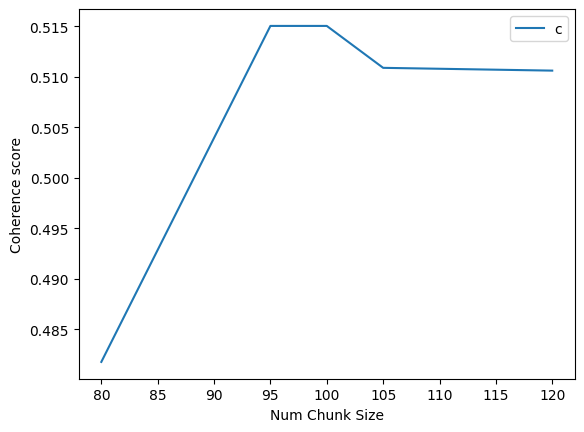

In [22]:
k = [80, 95, 100, 105, 120]
c_v = []

for c in k:
  id2word = corpora.Dictionary(lda1_df['T_T_pro'])
  texts = lda1_df['T_T_pro']
  corpus = [id2word.doc2bow(text) for text in texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=3,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=c,
                                              passes=25,
                                              alpha='auto',
                                              per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=lda1_df['T_T_pro'], dictionary=id2word, coherence='c_v')
  c_v.append(coherence_model_lda.get_coherence())

plt.plot(k, c_v)
plt.xlabel("Num Chunk Size")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Chunk size 95 also seems ideal.

In [23]:
#Referenced: https://www.geeksforgeeks.org/topic-modeling-using-latent-dirichlet-allocation-lda/